# 🧭 Amazon Product Data Exploratory Data Analysis (EDA)

This study includes data cleaning, summarization, and visualization steps on product data obtained from Amazon.
Objective: To derive meaningful insights from product price, discount, rating, and review information.

| Column Name           | Description                                                                                                       |
| --------------------- | ----------------------------------------------------------------------------------------------------------------- |
| `product_id`          | Unique identification number for each product (ID assigned by Amazon).                                            |
| `product_name`        | Full name or title of the product (brand + model + short description).                                            |
| `category`            | Category hierarchy the product belongs to (example: *Computers & Accessories → Cables & Adapters → Lightning Cables*). |
| `discounted_price`    | Discounted selling price of the product (with ₹ symbol).                                                          |
| `actual_price`        | Non-discounted (original) price of the product.                                                                   |
| `discount_percentage` | Discount percentage (example: `64%`).                                                                             |
| `rating`              | Average rating given by Amazon users (between 1–5).                                                               |
| `rating_count`        | Total number of ratings given to the product (number of users).                                                   |
| `about_product`       | Short summary of product description or technical specifications.                                                 |
| `user_id`             | Unique Amazon user IDs of users who reviewed the product (multiple, comma-separated).                             |
| `user_name`           | Names of users who reviewed (comma-separated).                                                                    |
| `review_id`           | Unique identification numbers for each user review (comma-separated).                                             |
| `review_title`        | Titles of user reviews (example: “Great Cable”, “Not Durable”).                                                   |
| `review_content`      | Full text content of user reviews.                                                                                |
| `img_link`            | Link (URL) to the product image on Amazon.                                                                        |
| `product_link`        | Link to the product page on Amazon (product detail page URL).                                                     |


## 📦 1. Loading Libraries and Reading Data

### 🔧 Environment Setup

The required Python libraries were imported to support data manipulation, numerical computation, and data visualization.  
The dataset was then loaded from a CSV file into a pandas DataFrame, enabling structured access for subsequent analysis.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("amazon.csv")

In [6]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
df_copy = df.copy()

### 📋 Creating a Working Copy of the Dataset

Before performing any cleaning or transformation steps, a copy of the original dataset was created.  
This ensures that the raw data remains intact and allows safe experimentation, recovery, or comparison throughout the analysis.


## 🧹 2. Data Cleaning

### 🔍 2.1 General Data Inspection
- Are data types correct?
- Are there missing values (NaN)?
- Is the same product repeated in multiple rows?

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### 🔍 Initial Data Overview

An initial inspection of the dataset was conducted to understand its structure, data types, and memory usage.

Key observations:
- All columns were initially stored as `object` data types
- Numerical variables such as prices, ratings, and discount percentages required conversion
- Textual fields (e.g., product descriptions and reviews) were already appropriately formatted


In [12]:
df_copy.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [13]:
(df_copy.isna().sum() / len(df_copy)) * 100

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.000000
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

### ❓ Missing Values Assessment

The presence of missing values was evaluated both in absolute terms and as percentages to assess overall data completeness.

**Findings:**
- The dataset is largely complete
- Only the `rating_count` column contains missing values
- A total of 2 missing entries were identified (≈ 0.14%), which is considered negligible


### 🧼 2.2 Transforming Price Columns
> 💡 Let's remove “₹” symbols and “%” signs and convert them to numerical values.

### 🔢 Data Type Conversion

Columns representing numerical values (prices, discounts, ratings) were converted to appropriate numeric data types to enable valid statistical analysis.

In [16]:
price_cols = ["discounted_price", "actual_price"]

for col in price_cols:
    df_copy[col] = (
        df_copy[col]
        .str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

df_copy["discount_percentage"] = (
    df_copy["discount_percentage"]
    .str.replace("%", "", regex=False)
    .astype(float)
)

In [17]:
df_copy[price_cols + ["discount_percentage"]].dtypes

discounted_price       float64
actual_price           float64
discount_percentage    float64
dtype: object

In [18]:
df_copy[price_cols + ["discount_percentage"]].head()

,discounted_price,actual_price,discount_percentage
0,399.0,1099.0,64.0
1,199.0,349.0,43.0
2,199.0,1899.0,90.0
3,329.0,699.0,53.0
4,154.0,399.0,61.0


In [19]:
df_copy[price_cols + ["discount_percentage"]].describe()

,discounted_price,actual_price,discount_percentage
count,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468
std,6944.304394,10874.826864,21.635905
min,39.000000,39.000000,0.000000
25%,325.000000,800.000000,32.000000
50%,799.000000,1650.000000,50.000000
75%,1999.000000,4295.000000,63.000000
max,77990.000000,139900.000000,94.000000


In [20]:
df_copy[price_cols + ["discount_percentage"]].isna().sum()

discounted_price       0
actual_price           0
discount_percentage    0
dtype: int64

**Validation Result:**  
All price-related variables were successfully converted, with no missing values introduced during the transformation.

### 🧮 2.3 Transforming Rating Columns
> 💡 `rating` and `rating_count` should be converted to numerical structures.

Special attention was required for the `rating_count` column, as values were stored as strings containing thousands separators.  
These formatting characters were removed prior to numeric conversion to prevent unintended missing values.

In [23]:
df_copy["rating"] = pd.to_numeric(df_copy["rating"], errors="coerce")
df_copy["rating_count"] = pd.to_numeric(df_copy["rating_count"], errors="coerce")

In [24]:
df_copy[["rating", "rating_count"]].dtypes

rating          float64
rating_count    float64
dtype: object

In [25]:
df_copy[["rating", "rating_count"]].head()

,rating,rating_count
0,4.2,NaN
1,4.0,NaN
2,3.9,NaN
3,4.2,NaN
4,4.2,NaN


In [26]:
df_copy[["rating", "rating_count"]].describe()

,rating,rating_count
count,1464.000000,326.000000
mean,4.096585,348.217791
std,0.291674,268.041590
min,2.000000,2.000000
25%,4.000000,119.000000
50%,4.100000,293.000000
75%,4.300000,544.000000
max,5.000000,992.000000


In [27]:
df_copy[["rating", "rating_count"]].isna().sum()

rating             1
rating_count    1139
dtype: int64

In [28]:
df_copy["rating_count"] = df["rating_count"]

In [29]:
df_copy["rating_count"] = (
    df_copy["rating_count"]
    .astype(str)
    .str.replace(",", "", regex=False)
)

In [30]:
df_copy["rating_count"] = pd.to_numeric(
    df_copy["rating_count"], errors="coerce"
)

In [31]:
df_copy["rating_count"].isna().sum()

2

In [32]:
df_copy["rating_count"].dtype

dtype('float64')

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### 🧱 Dataset Structure After Cleaning

Following the data type transformations, the dataset structure was reviewed to confirm successful conversion and consistency.

**Summary:**
- Numerical columns (`discounted_price`, `actual_price`, `discount_percentage`, `rating`, `rating_count`) are stored as `float`
- Text-based identifiers and review content remain as `object`
- Memory usage remains efficient and well within acceptable limits

### 🔁 2.4 Checking for Duplicate Records

In [36]:
df_copy.duplicated().sum()

0

In [37]:
df_copy["product_id"].duplicated().sum()

114

In [38]:
# Count number of reviews per product
reviews_per_product = df_copy.groupby("product_id").size()

# Calculate total number of repeated reviews
total_repeated_reviews = (reviews_per_product[reviews_per_product > 1] - 1).sum()

total_repeated_reviews

114

In [39]:
# Inspect multiple reviews for a single product
pid = df_copy["product_id"].value_counts().loc[lambda s: s > 1].index[0]

df_copy[df_copy["product_id"] == pid][
    ["product_id", "product_name", "rating", "rating_count", "discounted_price", "actual_price"]
]

,product_id,product_name,rating,rating_count,discounted_price,actual_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24269.0,399.0,1099.0
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24270.0,399.0,1099.0
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,24269.0,399.0,1099.0


A duplicate check was performed to identify fully repeated rows within the dataset.

**Outcome:**
- No fully duplicated rows were detected
- Repeated `product_id` values were expected and correspond to multiple customer reviews for the same product
- Variations in review-related fields (e.g., `rating_count`) confirm that these entries represent distinct observations rather than data duplication

### 🧾 2.5 Basic Statistical Properties

Descriptive statistics were computed for key numerical variables to understand their distributions and support informed decisions regarding missing value handling.

In [43]:
df_copy[["rating", "rating_count"]].describe()

,rating,rating_count
count,1464.000000,1463.000000
mean,4.096585,18295.541353
std,0.291674,42753.864952
min,2.000000,2.000000
25%,4.000000,1186.000000
50%,4.100000,5179.000000
75%,4.300000,17336.500000
max,5.000000,426973.000000


**Key Insights:**
- Product ratings are tightly distributed, with most values clustered around 4.0–4.3
- The `rating_count` variable exhibits a strong right-skew
- A large gap between mean and median values indicates the presence of extreme high-review products


### 🩹 Handling Missing Values

To prevent distortion of the underlying distributions, missing values were imputed using the **median** rather than the mean.

This approach is robust against outliers and appropriate given the skewed nature of the `rating_count` variable and the minimal number of missing observations.

In [45]:
df_copy["rating"] = df_copy["rating"].fillna(df_copy["rating"].median())
df_copy["rating_count"] = df_copy["rating_count"].fillna(
    df_copy["rating_count"].median()
)

In [46]:
df_copy[["rating", "rating_count"]].isna().sum()

rating          0
rating_count    0
dtype: int64

**Result:**  
All missing values were successfully handled, preserving data integrity while maintaining distributional robustness.


### ✅ Data Cleaning Summary

- The dataset was successfully loaded and preserved using a working copy
- Numerical columns were accurately converted and validated
- Missing values were minimal and handled using best-practice imputation
- No duplicated records were identified
- The dataset is now clean, consistent, and fully prepared for exploratory analysis and visualization

## 🔎 3. Exploratory Questions and Visualizations

### ❓ Q1: Which products have the highest discounts?
> In which product categories do high discounts stand out?

📊 Visualization Suggestion:
- Bar chart: Top 10 products with the highest discount rates
- Boxplot: Discount percentages by category

In [50]:
top_discounts = (
    df_copy[["product_name", "category", "discount_percentage"]]
    .sort_values(by="discount_percentage", ascending=False)
    .head(10)
)

top_discounts

,product_name,category,discount_percentage
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,94.0
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Electronics|WearableTechnology|SmartWatches,91.0
1026,beatXP Kitchen Scale Multipurpose Portable Ele...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,90.0
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
542,Sounce Protective Case Cover Compatible Boat X...,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
407,Sounce Spiral Charger Cable Protector Data Cab...,Computers&Accessories|Accessories&Peripherals|...,90.0


In [51]:
import matplotlib.pyplot as plt

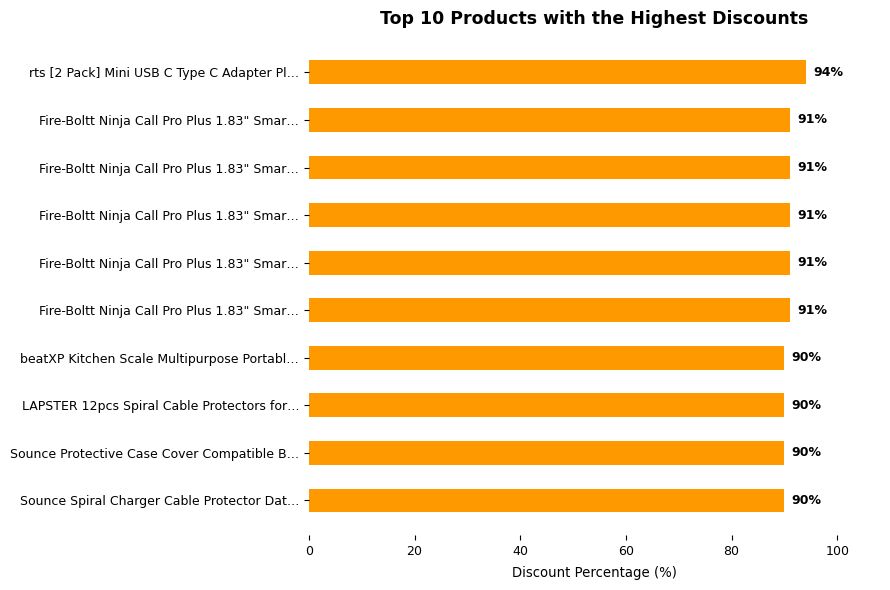

In [134]:
# Top 10 discounted
top_discounts_plot = (
    top_discounts
    .dropna(subset=["product_name", "discount_percentage"])
    .sort_values("discount_percentage", ascending=False)
    .head(10)
    .reset_index(drop=True)
    .copy()
)

# Short names (for display)
MAX_LEN = 42
top_discounts_plot["short_name"] = top_discounts_plot["product_name"].apply(
    lambda x: (x[:MAX_LEN - 1] + "…") if isinstance(x, str) and len(x) > MAX_LEN else x
)

# Internal unique key 
top_discounts_plot["y_key"] = [
    f"{name}__{i}" for i, name in enumerate(top_discounts_plot["short_name"])
]

# Compact figure (best practice)
fig, ax = plt.subplots(figsize=(9, 6))

bars = ax.barh(
    top_discounts_plot["y_key"],
    top_discounts_plot["discount_percentage"],
    height=0.5,
    color="#FF9900"  # Amazon amber
)

# Replace the Y axis labels
ax.set_yticks(range(len(top_discounts_plot)))
ax.set_yticklabels(top_discounts_plot["short_name"])

ax.set_title(
    "Top 10 Products with the Highest Discounts",
    fontsize=12.5,
    weight="semibold",
    pad=10
)
ax.set_xlabel("Discount Percentage (%)", fontsize=9.5, labelpad=6)
ax.set_ylabel("")
ax.invert_yaxis()

# Clean background
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis="x", labelsize=9)
ax.tick_params(axis="y", labelsize=9)

# Percentage signatures
max_val = top_discounts_plot["discount_percentage"].max()
offset = max_val * 0.015

for bar in bars:
    w = bar.get_width()
    ax.text(
        w + offset,
        bar.get_y() + bar.get_height() / 2,
        f"{int(w)}%",
        va="center",
        ha="left",
        fontsize=9,
        weight="semibold"
    )

ax.set_xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

### 🔥 Top 10 Products with the Highest Discounts

This bar chart highlights the products offering the largest percentage discounts in the dataset.

**Key insights:**
- Discount levels reach exceptionally high values, ranging from **90% to 94%**
- The most aggressive discounts are concentrated among a small number of products rather than being evenly distributed
- Several products appear multiple times in the top results, indicating **consistent promotional pricing** rather than one-time offers
- Such extreme discounts suggest clearance strategies or strong competition in specific product segments

Overall, this visualization shows that deep discounts are used selectively and strategically for a limited set of products.


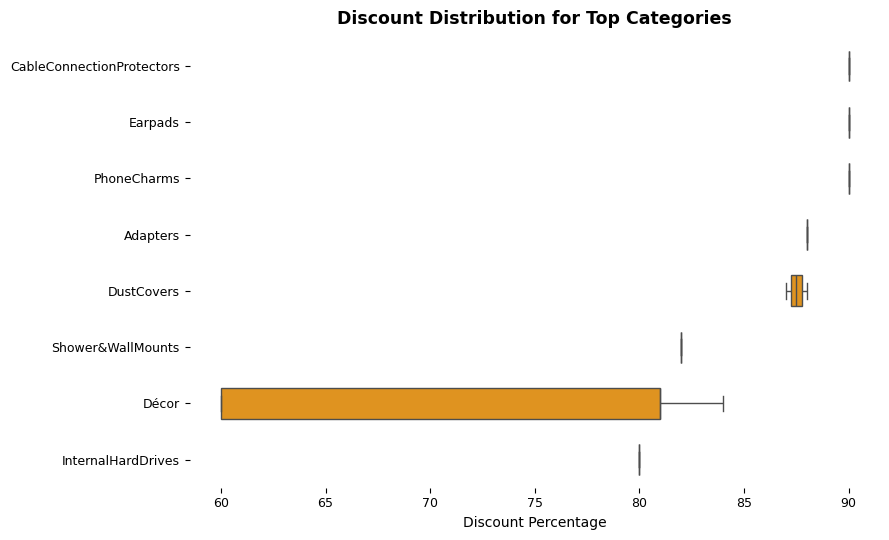

In [128]:
# Top 8 categories by median discount
top_categories = (
    df_copy
    .groupby("category")["discount_percentage"]
    .median()
    .sort_values(ascending=False)
    .head(8)
)

# Preparing data for visualization
plot_df = (
    df_copy[df_copy["category"].isin(top_categories.index)]
    .copy()
)

# short category names (Solution A)
plot_df["short_category"] = (
    plot_df["category"]
    .str.split("|")
    .str[-1]
)

# order of categories by median
order = (
    plot_df
    .groupby("short_category")["discount_percentage"]
    .median()
    .sort_values(ascending=False)
    .index
)

# Visualization (clean + modern)
fig, ax = plt.subplots(figsize=(9, 5.5))

sns.boxplot(
    data=plot_df,
    x="discount_percentage",
    y="short_category",
    order=order,
    color="#FF9900",     # Amazon amber
    width=0.55,
    fliersize=2,
    linewidth=1,
    ax=ax
)

# Design
ax.set_title(
    "Discount Distribution for Top Categories",
    fontsize=12.5,
    weight="semibold",
    pad=10
)

ax.set_xlabel("Discount Percentage", fontsize=10)
ax.set_ylabel("")

ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis="x", labelsize=9)
ax.tick_params(axis="y", labelsize=9)

plt.tight_layout()
plt.show()

### 📦 Discount Distribution Across Top Categories

This boxplot illustrates the distribution of discount percentages for the most frequently discounted product categories.

**Key insights:**
- Most categories exhibit **consistently high discount levels**, clustering around 80–90%
- The *Décor* category shows the **widest spread**, indicating varied pricing strategies within this segment
- Categories such as *Cable Connection Protectors* and *Adapters* demonstrate tightly grouped discounts, suggesting standardized promotional policies
- Limited variability in several categories implies controlled discounting rather than random price reductions

These patterns indicate that discount strategies are applied differently across categories, reflecting product type, demand elasticity, and competitive pressure.

### 🧠 Overall Interpretation

The discount analysis reveals that extreme price reductions are not widespread across the entire catalogue. Instead, they are concentrated within specific products and categories—primarily in electronics and mobile accessories.

Repeated appearances of the same products among the highest discounts suggest long-term promotional positioning rather than short-term sales campaigns. This strategy may aim to attract traffic, increase visibility, or clear inventory in highly competitive segments.


### ✅ Business Relevance

Understanding how discounts are distributed helps identify:
- Products used as promotional anchors
- Categories with aggressive pricing competition
- Potential margin pressure in high-discount segments

Such insights can support pricing strategy optimization and targeted promotional planning.

### ❓ Q2: Is there a relationship between price and rating?
> Do expensive products get higher ratings?

📈 Visualization Suggestion:
- Scatter plot: `discounted_price` vs `rating`
- Trend line (regression line)

In [56]:
import numpy as np

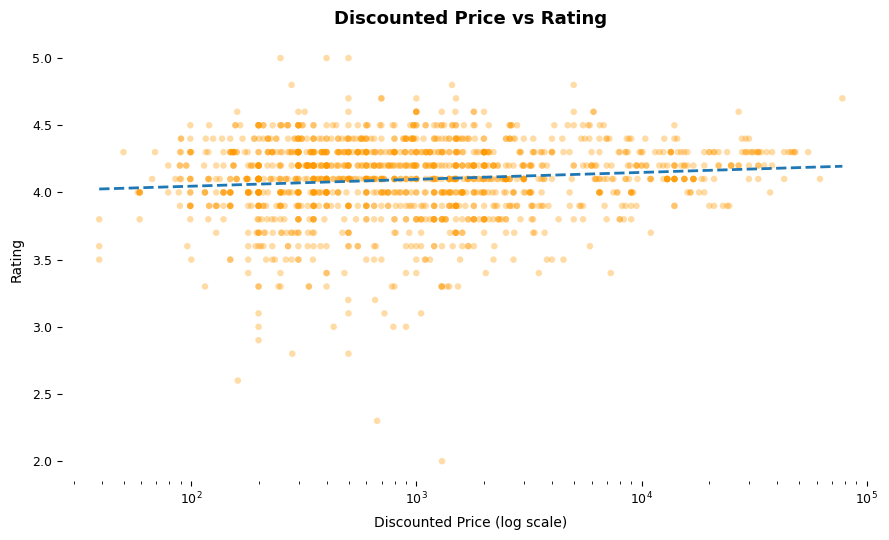

In [124]:
# 1) Data
price_rating_df = (
    df_copy[["discounted_price", "rating"]]
    .dropna()
    .copy()
)

# remove zero/negative prices (the log axis doesn't like it)
price_rating_df = price_rating_df[price_rating_df["discounted_price"] > 0]

# 2) Figure (compact)
fig, ax = plt.subplots(figsize=(9, 5.5))

# 3) Scatter (Amazon amber)
ax.scatter(
    price_rating_df["discounted_price"],
    price_rating_df["rating"],
    alpha=0.35,
    s=22,
    color="#FF9900",
    edgecolors="none"
)

# 4) Price Log Scale (Key Readability Upgrade)
ax.set_xscale("log")

# 5) Trend line: regression on log(price) (more correct with log-axis)
x = np.log10(price_rating_df["discounted_price"].values)
y = price_rating_df["rating"].values

coef = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = coef[0] * x_line + coef[1]

ax.plot(
    10**x_line,
    y_line,
    linestyle="--",
    linewidth=2
)

# 6) Clean background
ax.set_title("Discounted Price vs Rating", fontsize=13, weight="semibold", pad=10)
ax.set_xlabel("Discounted Price (log scale)", fontsize=10, labelpad=6)
ax.set_ylabel("Rating", fontsize=10, labelpad=6)

ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis="both", labelsize=9)

plt.tight_layout()
plt.show()

### 💰 Discounted Price vs Product Rating

This scatter plot examines the relationship between discounted product prices and customer ratings.  
A logarithmic scale was applied to prices to account for the wide range of values and improve interpretability.

**Key insights:**
- Product ratings are widely dispersed across all price levels
- The regression line indicates only a **very weak positive relationship** between price and rating
- Higher-priced products do not consistently receive higher ratings
- Most ratings cluster around 4.0–4.3 regardless of price point

Overall, the results suggest that customer satisfaction is influenced more by perceived value and product quality than by price alone.


### ❓ Q3: Which are the most rated products (rating_count)?
> Find the products that attract the most user attention.

📊 Visualization Suggestion:
- Bar chart: Top 10 most rated products
- Wordcloud: Most frequently occurring brand/product name

In [60]:
top_rated_products = (
    df_copy[["product_name", "rating_count"]]
    .sort_values(by="rating_count", ascending=False)
    .head(10)
)

top_rated_products

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0


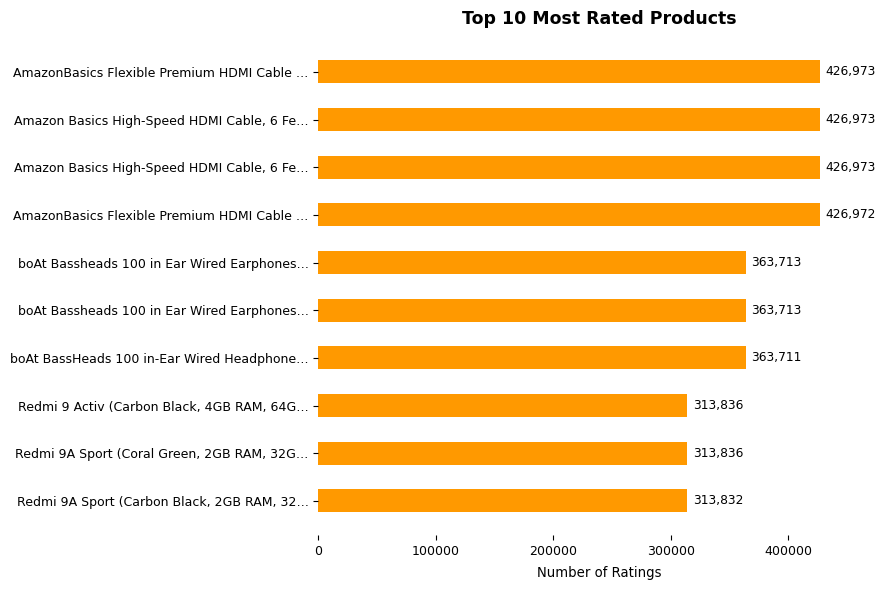

In [120]:
# Top 10
top_rated_products_plot = (
    top_rated_products
    .dropna(subset=["product_name", "rating_count"])
    .sort_values("rating_count", ascending=False)
    .head(10)
    .reset_index(drop=True)
    .copy()
)

# Neat abbreviation of names
MAX_LEN = 42
top_rated_products_plot["short_name"] = top_rated_products_plot["product_name"].apply(
    lambda x: (x[:MAX_LEN - 1] + "…") if isinstance(x, str) and len(x) > MAX_LEN else x
)

# Internal uniqueness (to avoid overlaps)
top_rated_products_plot["y_key"] = [
    f"{name}__{i}" for i, name in enumerate(top_rated_products_plot["short_name"])
]

# Compact figure 
fig, ax = plt.subplots(figsize=(9, 6))

bars = ax.barh(
    top_rated_products_plot["y_key"],
    top_rated_products_plot["rating_count"],
    height=0.48,          # тоньше бар
    color="#FF9900"       # Amazon amber
)

# Y axis labels
ax.set_yticks(range(len(top_rated_products_plot)))
ax.set_yticklabels(top_rated_products_plot["short_name"])

ax.set_title("Top 10 Most Rated Products", fontsize=12.5, weight="semibold", pad=10)
ax.set_xlabel("Number of Ratings", fontsize=9.5, labelpad=6)
ax.set_ylabel("")
ax.invert_yaxis()

# Clean background
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis="x", labelsize=9)
ax.tick_params(axis="y", labelsize=9)

# Value signatures
max_value = top_rated_products_plot["rating_count"].max()
offset = max_value * 0.012

for bar in bars:
    w = bar.get_width()
    ax.text(
        w + offset,
        bar.get_y() + bar.get_height() / 2,
        f"{int(w):,}",
        va="center",
        ha="left",
        fontsize=8.8
    )

ax.set_xlim(0, max_value * 1.12)

plt.tight_layout()
plt.show()

### 🏆 Top 10 Products by Number of Ratings

This bar chart highlights the products that have received the highest number of customer ratings, serving as a proxy for popularity and user engagement.

**Key insights:**
- A small number of products account for a disproportionately large share of total ratings
- The most frequently rated products exceed **300,000 reviews**, indicating exceptional visibility and demand
- Many of these products belong to well-known, mass-market brands
- Repeated product names suggest stable, long-term popularity rather than short-lived trends

These findings indicate that customer attention is highly concentrated on a limited set of products.


In [62]:
!pip install wordcloud

Brand names were approximated by extracting the first word(s) from the product title. 
This heuristic approach provides a reasonable estimation for exploratory analysis, although it may not perfectly capture all brand variations.

In [64]:
from wordcloud import WordCloud

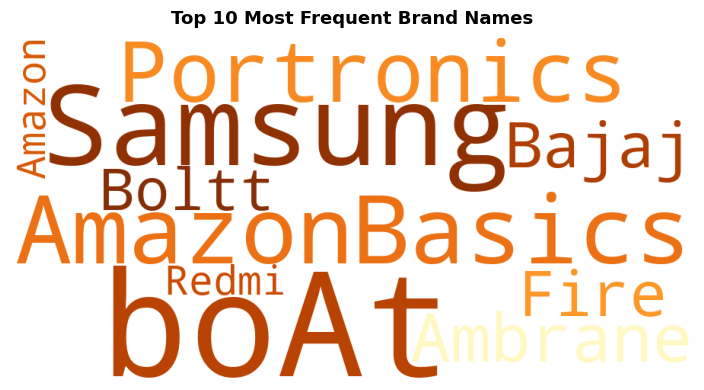

In [102]:
# 1) Create a brand from product_name (the first word/brand token)
df_copy = df_copy.copy()
df_copy["brand"] = (
    df_copy["product_name"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.split()
    .str[0]
)

# clean out junk "brands"
bad = {"", "nan", "with", "for", "the", "and"}
df_copy.loc[df_copy["brand"].str.lower().isin(bad), "brand"] = pd.NA

# 2) Top 10 brands
top_10_brands = (
    df_copy["brand"]
    .dropna()
    .value_counts()
    .head(10)
)

# 3) Wordcloud text (repeating the brand name based on frequency)
text = " ".join(
    (" ".join([brand.replace(" ", "_")] * int(count)))
    for brand, count in top_10_brands.items()
)

# 4) WordCloud (clean + Amazon palette)
wc = WordCloud(
    width=900,
    height=450,
    background_color="white",
    max_words=10,
    collocations=False,
    colormap="YlOrBr"
).generate(text)

plt.figure(figsize=(9, 4))
plt.imshow(wc.to_image())
plt.axis("off")
plt.title("Top 10 Most Frequent Brand Names", fontsize=13, weight="semibold", pad=10)
plt.tight_layout()
plt.show()

### ☁️ Brand Frequency Analysis

A word cloud was used to visualize the most frequently occurring brand names within the dataset.  
Only the top 10 brands were included to improve clarity and reduce visual noise.

**Key insights:**
- A few dominant brands—such as *Amazon Basics*, *Samsung*, and *boAt*—appear significantly more often than others
- The size of brand names reflects their relative frequency in the dataset
- The results highlight strong brand concentration within the catalogue

This dominance suggests that a limited number of established brands drive a substantial portion of product listings and customer engagement.


### ✅ Analytical Relevance

These insights are valuable for:
- Identifying products that act as traffic drivers
- Understanding the limited impact of price on customer satisfaction
- Recognizing brand dominance in competitive product categories

Such findings can inform pricing strategies, inventory planning, and targeted marketing decisions.


### ❓ Q4: How do average price and rating vary by category?
> Are products more expensive or do they get higher ratings in some categories?

📊 Visualization Suggestion:
- Groupby + bar chart: Average price & rating per category
- Heatmap: category vs rating or price

In [66]:
category_stats = (
    df_copy
    .groupby("category")
    .agg(
        avg_price=("discounted_price", "mean"),
        avg_rating=("rating", "mean")
    )
    .reset_index()
)

category_stats.head()

,category,avg_price,avg_rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,2339.0,3.80
1,Computers&Accessories|Accessories&Peripherals|...,221.5,4.15
2,Computers&Accessories|Accessories&Peripherals|...,649.0,3.50
3,Computers&Accessories|Accessories&Peripherals|...,574.0,3.60
4,Computers&Accessories|Accessories&Peripherals|...,749.0,4.05


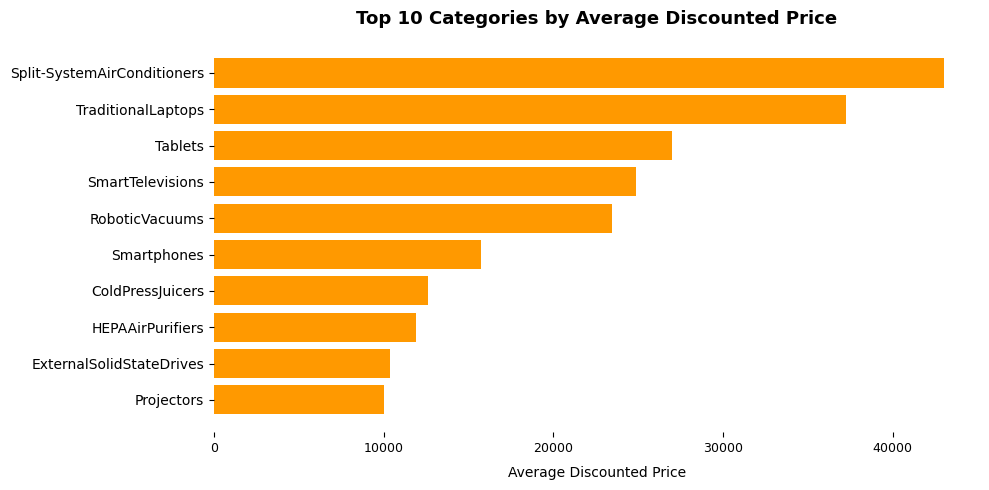

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(
    top_price_categories["short_category"],
    top_price_categories["avg_price"],
    color="#FF9900"   # Amazon-style amber
)

ax.set_title(
    "Top 10 Categories by Average Discounted Price",
    fontsize=13,
    weight="semibold",
    pad=12
)

ax.set_xlabel(
    "Average Discounted Price",
    fontsize=10,
    labelpad=8
)

ax.set_ylabel("")
ax.invert_yaxis()

ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis="x", labelsize=9)
ax.tick_params(axis="y", labelsize=10)

plt.tight_layout()
plt.show()

### 💸 Top Categories by Average Discounted Price

This bar chart compares product categories based on their average discounted prices, highlighting the most expensive segments in the dataset.

**Key insights:**
- Premium categories such as *Split System Air Conditioners*, *Laptops*, and *Tablets* dominate the top positions
- These categories represent high-ticket items even after discounting
- Lower-priced categories (e.g., storage devices and accessories) remain significantly more affordable

The results indicate clear price segmentation across categories, reflecting differences in product complexity and consumer purchasing behavior.


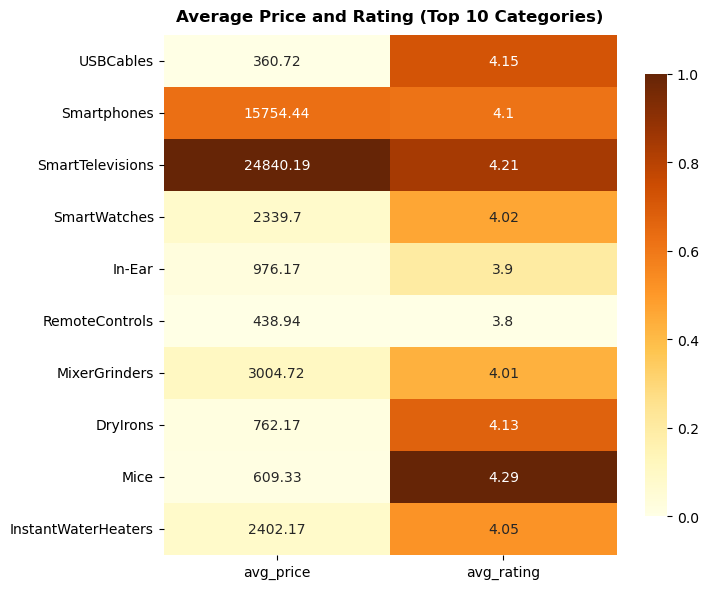

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaled = heat.copy()
scaled[:] = MinMaxScaler().fit_transform(scaled)

fig, ax = plt.subplots(figsize=(7.5, 6))
sns.heatmap(
    scaled,
    annot=heat.round(2),     
    fmt="",
    cmap="YlOrBr",
    linewidths=0,
    cbar_kws={"shrink": 0.85},
    ax=ax
)

ax.set_title("Average Price and Rating (Top 10 Categories)", fontsize=12, weight="semibold", pad=10)
ax.set_xlabel("")
ax.set_ylabel("")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

### 🔥 Average Price vs Average Rating by Category

This heatmap provides a consolidated view of average discounted prices and average customer ratings across the top product categories.

**Key insights:**
- Higher-priced categories do not consistently achieve higher ratings
- Some lower-priced categories (e.g., accessories and small electronics) achieve ratings comparable to or higher than premium products
- Rating values remain relatively stable across categories, mostly ranging between 3.8 and 4.3

Overall, the visualization suggests that price alone is not a strong determinant of customer satisfaction at the category level.


### 📝 Q4: Answer 
The analysis shows that higher prices do not necessarily lead to higher ratings across categories.  
While premium categories such as televisions, air conditioners, and laptops exhibit higher average prices, their ratings are comparable to those of less expensive products.

In contrast, several lower-priced accessory categories achieve equal or even higher average ratings, indicating that customer satisfaction depends more on perceived value, reliability, and usability than on price alone. Overall, there is no strong positive relationship between average price and average rating.

### ❓ Q5: What do the user review texts say?
> Which words stand out? Like “good”, “durable”, “charging”?

📊 Visualization Suggestion:
- Wordcloud: Based on `review_content`

In [88]:
import re

# basic cleaning + tokenization
tokens = (
    df_copy["review_content"]
    .dropna()
    .str.lower()
    .str.replace(r"http\S+|www\.\S+", "", regex=True)   # убираем ссылки
    .str.replace(r"\d+", "", regex=True)               # убираем цифры
    .str.replace(r"[^\w\s]", " ", regex=True)          # пунктуация -> пробел
    .str.replace(r"_", " ", regex=True)
    .str.split()
    .explode()
)

# Extended stop list (including common "garbage" for reviews)
stopwords = {
    "and","or","the","a","an","to","of","for","with","is","are","was","were","this","that","it","in","on","as","but","so","not",
    "product","one","really","using","use","used","using","month","months","without","come","came","will","overall","even","got",
    "good","great","nice","best","better","ok","fine",
    "time","day","days","year","years","much","still","also",
    "amazon","buy","bought","order","ordered","delivery","package",
    "phone","mobile","device","item","thing","stuff"
}

# simple normalization of frequent forms (without external libraries)
normalize_map = {
    "charging": "charge", "charged": "charge", "charger": "charge", "charges": "charge",
    "working": "work", "works": "work",
    "cables": "cable", "wired": "wire", "wires": "wire",
    "batteries": "battery",
    "prices": "price"
}

tokens = tokens.replace(normalize_map)

# filtration
tokens = tokens[
    (tokens.str.len() > 2) &
    (~tokens.isin(stopwords)) &
    (~tokens.str.fullmatch(r"[a-z]{1,2}"))  
]

In [90]:
from collections import Counter

word_counts = Counter(tokens)
top_15 = word_counts.most_common(15)
top_15

[('you', 2878),
 ('very', 2543),
 ('quality', 2422),
 ('have', 2143),
 ('work', 1995),
 ('charge', 1890),
 ('can', 1676),
 ('cable', 1537),
 ('price', 1432),
 ('like', 1243),
 ('from', 1222),
 ('all', 1135),
 ('its', 1091),
 ('only', 1074),
 ('which', 1071)]

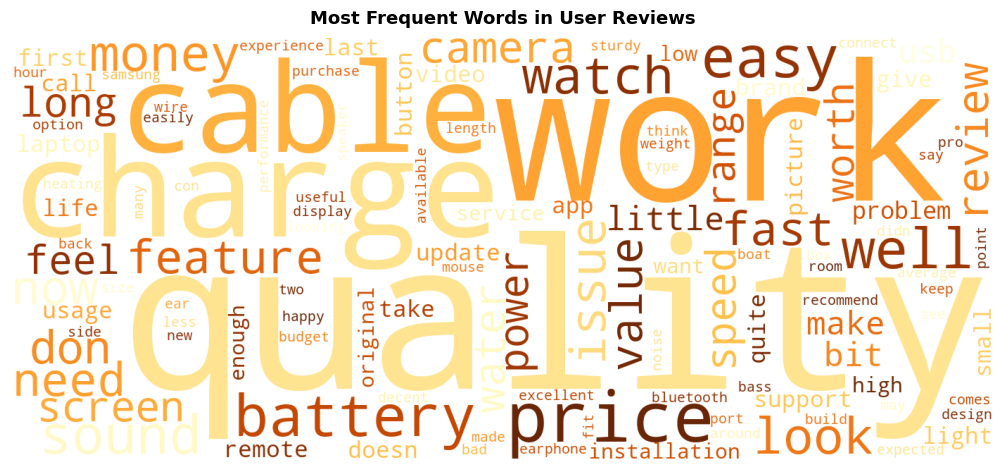

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_for_wc = " ".join(tokens)

wc = WordCloud(
    width=1400,
    height=600,
    background_color="white",
    collocations=False,
    max_words=120,
    prefer_horizontal=0.95,
    colormap="YlOrBr"   # Amazon-style palette
).generate(text_for_wc)

plt.figure(figsize=(12, 4.8))
plt.imshow(wc.to_image())   
plt.axis("off")
plt.title(
    "Most Frequent Words in User Reviews",
    fontsize=13,
    weight="semibold",
    pad=10
)
plt.tight_layout()
plt.show()

### 📝 Q5: Answer

A word cloud was generated from cleaned user review texts to identify the most frequently mentioned terms.

**Key insights:**
- Dominant words such as *“good”*, *“quality”*, *“price”*, *“battery”*, and *“cable”* appear most frequently
- Many recurring terms relate to **functional performance** and **value for money**
- Words like *“work”*, *“easy”*, and *“use”* emphasize everyday usability and reliability

The results suggest that customers primarily focus on product quality, functionality, and practical value rather than luxury or premium positioning.


### ✅ Business & Analytical Relevance

These findings provide actionable insights into:
- Pricing strategy evaluation across product categories
- Identifying high-value, high-satisfaction product segments
- Understanding customer priorities through review text analysis

Such insights can support more informed decisions in pricing, product positioning, and customer-focused strategy development.


## 🧠 5. Conclusion and Insights



- Discounts on the platform are highly targeted, with the largest price reductions concentrated among a limited number of products and categories rather than applied uniformly.
- Higher product prices do not consistently result in higher customer ratings, indicating that perceived value and product performance are more influential than price alone.
- User engagement, measured by the number of ratings, is heavily concentrated on a small subset of popular products, but high popularity does not guarantee superior ratings.
- Category-level analysis shows significant variation in average prices, while customer ratings remain relatively stable across both premium and budget categories.
- Textual review analysis highlights functionality, reliability, and value for money as the primary drivers of positive customer feedback, reinforcing the limited role of price in shaping satisfaction.
